<a href="https://colab.research.google.com/github/Gaazedo/EstudosTensorFlow/blob/main/C%C3%B3pia_de_estudos_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este é um notebook de dados sobre Deep Learning e minha rede neural: 

In [ ]:
#Bloco de Import

import keras 
from keras.datasets import mnist #database mnist
from tensorflow.python.keras import Sequential #Modelo da rede
from tensorflow.python.keras.layers import Dense, Dropout #NEURONIO E REGULARIZADOR
from tensorflow.compat.v1.keras.optimizers import RMSprop #Otimizador


In [ ]:
#carregando dados de treino e teste 

(x_treino,y_treino),(x_teste,y_teste) = mnist.load_data()


In [ ]:
print("Quantidade de img para treino:",len(x_treino)) 

print("Quantidade de img para teste:",len(x_teste))

print("Tipo de dado de X_treino",type(x_treino))

primeira_img = x_treino[0]
print("Primeira Imagem:", primeira_img)

representacao_primeira_img = y_treino[0]
print("O que a imagem x_treino[0] representa:",representacao_primeira_img)

formato_primeira_img = primeira_img.shape
print("Formato da primeira img:", formato_primeira_img, type(formato_primeira_img))


Quantidade de img para treino: 60000
Quantidade de img para teste: 10000
Tipo de dado de X_treino <class 'numpy.ndarray'>
Primeira Imagem: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 

essa imagem representa: 5


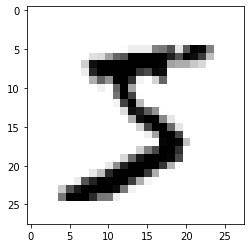

In [ ]:
import matplotlib.pyplot as plt

"""
Para cada imagem do dataset dentro do range ele irá printar com o uso de For
"""
"""
for indice in range(60000):
  print("essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice],cmap=plt.cm.binary)
  plt.show()
"""
indice = 0

print("essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice],cmap=plt.cm.binary) # o uso do cm.binary é para tornar preto e branco na escala de saida
plt.show()

In [ ]:
#Fluxo de construção da rede neural 

# - Organizar a camada de entrada (input)
# - Organizar a camada de saida (output)
# - Estrurtar a rede Neural
# - Treinar o modelo
# - Fazer Previsões

In [ ]:
#Achatando a matriz de pixels 


qtd_treino = len(x_treino) #60000 imgs
qtd_teste = len(x_teste) #10000 imgs

resolucao_img = x_treino[0].shape #(28px,28px) 
resolucao_total = resolucao_img[0]*resolucao_img[1] # 28 * 28 = 784px
x_treino = x_treino.reshape(qtd_treino,resolucao_total)
x_teste = x_teste.reshape(qtd_teste,resolucao_total)


In [ ]:
print("Quantidade de itens em x_treino[0]", len(x_treino[0]))

#como ficou x_treino
print(x_treino)


Quantidade de itens em x_treino[0] 784
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Normalização dos dados

#255 vira 1 
#127 vira 0.5
#0 vira 0 
#etc

#Garantir a entrada na rede neural é = 1
#como a img atual fornece um valor max de 255, precisamos normalizar
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(x_treino[0][350] ,type(x_treino[0][350]))

0.27450982 <class 'numpy.float32'>


In [ ]:
#Visualizando dados normalizados

print("Dados Normalizados:", x_treino[0])



Dados Normalizados: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [ ]:
#Preparação da Camada de Saida

valores_unicos = set(y_treino)
print("Valores unicos:", valores_unicos)

qtd_valores_unicos = len(valores_unicos) 
print("A quantidade de valores unicos é:",qtd_valores_unicos)

# Transformar valores unicos em var categoricas
#N 0 -> [1,0,0,0,0,0,0,0]
#N 1 -> [0,1,0,0,0,0,0,0]
#...
#N 9 -> [0,0,0,0,0,0,0,0,0,1]

print("y_treino[0] antes:",y_treino[0])

y_treino = keras.utils.to_categorical(y_treino,qtd_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste,qtd_valores_unicos)

print("y_treino[0] depois:",y_treino[0])

Valores unicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
A quantidade de valores unicos é: 10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Criando o modelo da rede neural

model = Sequential()

#Primeira Hidden Layer 
#30 neuronios
#Funcao de ativacao ReLU
#Como estamos na 1a hidden layer, precisamos declarar o formato da camada de entrada 

model.add(Dense(30, activation='relu',input_shape=(resolucao_total,)))

#add do regulador

model.add(Dropout(0.2))

#Segunda Layer
#20 neuronios 
#ativacao ReLU
model.add(Dense(20, activation='relu'))

#REGULARIZADOR
model.add(Dropout(0.2))

#FINALIZADOR - CAMADA DE SAIDA - qtd de valores unicos 

model.add(Dense(qtd_valores_unicos,activation='softmax'))

#exibe o resumo do modelo criado 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
#treina o modelo

history = model.fit(x_treino,y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste,y_teste))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.2264 - accuracy: 0.5945 - val_loss: 0.3198 - val_accuracy: 0.9076
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.8468 - val_loss: 0.2498 - val_accuracy: 0.9289
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4154 - accuracy: 0.8773 - val_loss: 0.2175 - val_accuracy: 0.9371
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8907 - val_loss: 0.2001 - val_accuracy: 0.9412
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.9001 - val_loss: 0.1971 - val_accuracy: 0.9433
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.9025 - val_loss: 0.1864 - val_accuracy: 0.9463
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.9091 - val_loss: 0.1764 - val_accuracy: 0.9472
Epoch 

Valor categorico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão: [[1.7242011e-05 5.0116596e-05 2.8911836e-03 6.1230080e-06 5.3073518e-04
  6.7222863e-04 9.9557424e-01 6.5158537e-07 2.5641851e-04 1.1072505e-06]]
Previsao Ajustada: [6]


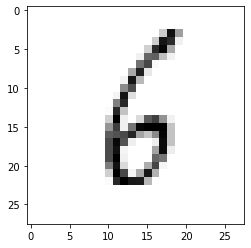

In [ ]:
#Fazendo Previsões

indice = 499

print("Valor categorico em y_teste[indice]:",y_teste[indice])

#preparar img para previsão
imagem = x_teste[indice].reshape((1,resolucao_total))

previsao = model.predict(imagem)
print("Previsão:", previsao)

import numpy as np

previsao_cat = np.argmax(previsao, axis = -1)
print("Previsao Ajustada:", previsao_cat)
#apenas para visualizar (não necessario em produção)
(x_treino_img,y_treino_img),(x_teste_img,y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice],cmap=plt.cm.binary)

In [ ]:
#Fazendo Previsões Infinitas testando diferentes indices 

indice = int(input("Indice: "))

print("Valor categorico em y_teste[indice]:",y_teste[indice])

#preparar img para previsão
imagem = x_teste[indice].reshape((1,resolucao_total))

previsao = model.predict(imagem)
print("Previsão:", previsao)

import numpy as np

previsao_cat = np.argmax(previsao, axis = -1)
print("Previsao Ajustada:", previsao_cat)
  #apenas para visualizar (não necessario em produção)
  #(x_treino_img,y_treino_img),(x_teste_img,y_teste_img) = mnist.load_data()
  #plt.imshow(x_teste_img[indice],cmap=plt.cm.binary)

Indice: 16
Valor categorico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Previsão: [[1.7616011e-07 6.4278801e-08 4.9990613e-05 8.1297061e-05 1.9593313e-03
  2.4636118e-05 5.8449537e-08 7.3519680e-03 9.2253860e-05 9.9044025e-01]]
Previsao Ajustada: [9]
